In [2]:
import pandas as pd
import numpy as np
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt

#### 1) Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como parâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda. A função, obrigatoriamente, deverá seguir a seguinte nomenclatura:

* A imagem poderá ser colorida ou em tons de cinza. No caso de imagens coloridas, o
processamento deverá ser feito em cada banda de cor o resultado será retornado em
uma única imagem;
* O filtro será uma matrix MxN, onde M e N são:
  * Ímpares;
  * Maiores ou iguais a 3;
  * Menores que o tamanho da imagem (em cada dimensão).
* O parâmetro borda deverá ter 4 valores possíveis:
  * ‘ignore’: nesse caso a borda não será processada;
  * ‘espelho’: no tratamento da borda os pixels serão espelhados;
  * ‘zero’: o tratamento da borda será adicionando pixels de valor zero;
  * ‘replicar’: nesse caso, no tratamento da borda somente os pixels das linhas
extremas serão replicados.
* Teste a função de convolução com pelo menos 5 filtros diferentes. Explique os
resultados.

#### 2) Crie uma função para aplicar filtros não-lineares, os filtros possíveis deverão ser o seguinte:
  * Mediana
  * Moda
  * Máximo
  * Mínimo
#### 3) Utilizando o algoritmo da questão 1, aplique o filtro Laplaciano em uma imagem em tons de
cinza. Utilize o filtro para realçar a imagem utilizada. O que aconteceu com a imagem após
a aplicação do realce?
#### 4) Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo da questão 1. Explique os passos de ambas implementações e diferencie o resultado das mesmas. Utilize pelo menos 5 valores de k no intervalor 0 < k < 2.
#### 5) Aplique os filtros da média e mediana em uma imagem ruidosa, o que aconteceu? Qual tipo de ruído existia na imagem?

In [44]:
img = imread("./ue.jpg")

In [45]:
img.shape

(280, 280, 3)

In [46]:
img2 = rgb2gray(img)
img2.shape

(280, 280)

In [35]:
np.array(img2,)

array([[0.17647059, 0.0745098 , 0.31372549, ..., 0.62745098, 0.90196078,
        0.92156863],
       [0.07058824, 0.2       , 0.36470588, ..., 0.29411765, 0.2627451 ,
        0.2       ],
       [0.09803922, 0.29019608, 0.2745098 , ..., 0.2627451 , 0.15686275,
        0.04705882],
       ...,
       [0.31764706, 0.25098039, 0.22352941, ..., 0.21960784, 0.45882353,
        0.32156863],
       [0.27058824, 0.29411765, 0.20392157, ..., 0.2745098 , 0.32156863,
        0.25882353],
       [0.35686275, 0.31372549, 0.08235294, ..., 0.29803922, 0.18823529,
        0.15686275]])

In [ ]:
def convolucao(imagem, filtro, borda='ignore'):
  #Imagem em nivel de cinza
  if len(img.shape) == 2:
    imagem_processada = np.array(img2)
    for m in range(img.shape[0]):
      for n in range(img.shape[1]):
        
    
  #imagem rgb
  else:
    pass
  return imagem_processada

In [7]:
import numpy as np
import cv2

def convolucao(imagem, filtro, borda='reflect'):
    # Obtém dimensões da imagem e do kernel
    imagem_h, imagem_w = imagem.shape[:2]
    kernel_h, kernel_w = filtro.shape[:2]

    # Adiciona bordas à imagem de acordo com o tratamento especificado
    if borda == 'reflect':
        imagem = cv2.copyMakeBorder(imagem, (kernel_h-1)//2, (kernel_h-1)//2, (kernel_w-1)//2, (kernel_w-1)//2, cv2.BORDER_REFLECT)
    elif borda == 'wrap':
        imagem = cv2.copyMakeBorder(imagem, (kernel_h-1)//2, (kernel_h-1)//2, (kernel_w-1)//2, (kernel_w-1)//2, cv2.BORDER_WRAP)
    elif borda == 'constant':
        imagem = cv2.copyMakeBorder(imagem, (kernel_h-1)//2, (kernel_h-1)//2, (kernel_w-1)//2, (kernel_w-1)//2, cv2.BORDER_CONSTANT, value=0)

    # Inicializa imagem de saída com zeros
    imagem_processada = np.zeros_like(imagem)

    # Loop através de cada pixel da imagem
    for i in range((kernel_h-1)//2, imagem_h+(kernel_h-1)//2):
        for j in range((kernel_w-1)//2, imagem_w+(kernel_w-1)//2):
            # Obtém sub-imagem de tamanho do kernel centrada no pixel atual
            sub_imagem = imagem[i-(kernel_h-1)//2:i+(kernel_h-1)//2+1, j-(kernel_w-1)//2:j+(kernel_w-1)//2+1]
            # Aplica o filtro de convolução
            imagem_processada[i,j] = np.sum(sub_imagem * filtro)

    # Remove as bordas adicionadas
    imagem_processada = imagem_processada[(kernel_h-1)//2:(kernel_h-1)//2+imagem_h, (kernel_w-1)//2:(kernel_w-1)//2+imagem_w]

    return imagem_processada

In [10]:
filtro = np.array([[1,2,1],[2,4,2],[1,2,1]])

In [39]:
teste=convolucao(img,filtro)

In [40]:
teste

array([[[116, 116, 116],
        [108, 108, 108],
        [124, 124, 124],
        ...,
        [164, 164, 164],
        [200, 200, 200],
        [168, 168, 168]],

       [[ 96,  96,  96],
        [172, 172, 172],
        [ 24,  24,  24],
        ...,
        [224, 224, 224],
        [232, 232, 232],
        [ 60,  60,  60]],

       [[112, 112, 112],
        [188, 188, 188],
        [ 64,  64,  64],
        ...,
        [232, 232, 232],
        [116, 116, 116],
        [112, 112, 112]],

       ...,

       [[216, 216, 216],
        [136, 136, 136],
        [176, 176, 176],
        ...,
        [ 52,  52,  52],
        [ 24,  24,  24],
        [168, 168, 168]],

       [[184, 184, 184],
        [164, 164, 164],
        [184, 184, 184],
        ...,
        [204, 204, 204],
        [208, 208, 208],
        [172, 172, 172]],

       [[112, 112, 112],
        [188, 188, 188],
        [ 56,  56,  56],
        ...,
        [ 40,  40,  40],
        [ 80,  80,  80],
        [160, 160, 160]]

In [25]:
from google.colab.patches import cv2_imshow

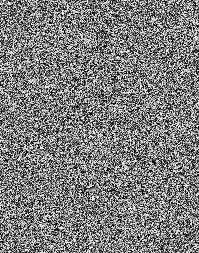

In [41]:
cv2_imshow(teste)

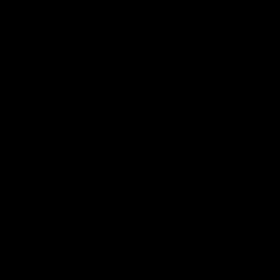

In [48]:
cv2_imshow(img2)

In [37]:
cv2.imwrite('rgb.jpg',img)

True